In [9]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
koi = pd.read_csv('../data/koi_clean.csv')
pscd = pd.read_csv('../data/pscd_clean.csv')

## Overall

In [11]:
# Length of datasets

len(koi), len(pscd)
print(f'koi: {len(koi)}, pcsd: {len(pscd)}.')
print(f'koi is{len(koi) / len(pscd): .2f} times longer')

koi: 7093, pcsd: 4877.
koi is 1.45 times longer


### Do the datasets include potentially habitable planets?

In [12]:
# Definition
#   - Mass: 0.1-10 EM
#   - Radius: 0.5-2.5 Earth radius
#   - Eq Temp: 175-270 Kelvin

temp_min, temp_max = 175, 270
mass_min, mass_max = 1, 10
radius_min, radius_max = 0.5, 2.5

In [13]:
def get_habitable_mask(data, mass_col=None, radius_col=None, temp_col=None):
    mass_mask = True
    if mass_col:
        mass_mask = (np.exp(data[mass_col]) >= 0.1) & (np.exp(data[mass_col]) <= 10)
        print(f'Mass match: {len(data[mass_mask]) / len(data) * 100:.2f}%')

    radius_mask = True
    if radius_col:
        radius_mask = (np.exp(data[radius_col]) >= 0.5) & (np.exp(data[radius_col]) <= 2.5)
        print(f'Radius match: {len(data[radius_mask]) / len(data) * 100:.2f}%')

    temp_mask = True
    if temp_col:
        temp_mask = (np.exp(data[temp_col]) >= 182) & (np.exp(data[temp_col]) <= 285)
        print(f'Temp match: {len(data[temp_mask]) / len(data) * 100:.2f}%')
    
    return mass_mask & radius_mask & temp_mask

def find_habitable(data, mass_col=None, radius_col=None, temp_col=None):
    habitable =  data[get_habitable_mask(data, mass_col, radius_col, temp_col)]
    print(f'{len(habitable)} total habitable planets found')

    return habitable

In [14]:
pscd_habitable = find_habitable(pscd, 'pl_bmasse', 'pl_rade', 'pl_eqt')
pscd_habitable.head()

Mass match: 99.88%
Radius match: 46.65%
Temp match: 1.54%
38 total habitable planets found


,Unnamed: 0,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
185,229,GJ 357 d,GJ 357,1,3,Radial Velocity,2019,Multiple Observatories,0,4.037086,0.055000,-0.055000,0.0,0.185649,0.0150,-0.0150,0.0,2.34,NaN,NaN,0.0,0.209,NaN,NaN,0.0,1.960095,1.0,-1.0,0.0,0.019008,0.00315,-0.00315,0.0,Msini,0.070115,NaN,NaN,NaN,0.322083,0.01,-0.01,0.0,220.0,6.0,-6.0,0.0,0,M2.5 V,3505.0,51.0,-51.0,0.0,0.292670,0.02,-0.02,0.0,0.34,0.01,-0.01,0.0,-0.12,0.16,-0.16,0.0,[Fe/H],4.94,0.07,-0.07,0.0,09h36m01.79s,144.007464,-21d39m54.23s,-21.665063,2.345818,0.005110,-0.005110,10.910,0.100,-0.100,6.475,0.017,-0.017,9.88036,0.001440,-0.001440
206,251,GJ 514 b,GJ 514,1,1,Radial Velocity,2022,Multiple Observatories,0,4.951805,0.410000,-0.410000,0.0,0.352064,0.0140,-0.0150,0.0,2.13,NaN,NaN,0.0,0.190,NaN,NaN,0.0,1.824549,0.9,-0.9,0.0,0.016228,0.00283,-0.00283,0.0,Msini,0.371564,0.15,-0.14,0.0,0.246860,0.07,-0.06,0.0,202.0,11.0,-11.0,0.0,0,M0.5-1.0 V,3728.0,68.0,-68.0,0.0,0.405465,0.05,-0.05,0.0,0.51,0.05,-0.05,0.0,-0.14,0.09,-0.09,0.0,[Fe/H],4.76,0.04,-0.04,0.0,13h30m00.97s,202.504042,+10d22m21.14s,10.372539,2.153828,0.003175,-0.003175,9.050,0.100,-0.100,5.036,0.027,-0.027,8.20621,0.000711,-0.000711
1178,1361,K2-18 b,K2-18,1,2,Transit,2015,K2,0,3.524583,0.000095,-0.000100,0.0,0.133569,0.0060,-0.0065,0.0,2.37,0.22,-0.22,0.0,0.211,0.020,-0.020,0.0,2.294553,1.7,-1.6,0.0,0.027683,0.00535,-0.00503,0.0,Mass,0.182322,0.08,-0.08,0.0,0.698135,0.08,-0.08,0.0,284.0,15.0,-15.0,0.0,0,M2.5 V,3457.0,39.0,-39.0,0.0,0.343590,0.04,-0.04,0.0,0.36,0.05,-0.05,0.0,0.12,0.16,-0.16,0.0,[Fe/H],4.79,0.01,-0.01,0.0,11h30m14.43s,172.560141,+07d35m16.19s,7.587832,3.664243,0.079550,-0.079550,13.477,0.042,-0.042,8.899,0.019,-0.019,12.41540,0.000502,-0.000502
1334,1518,K2-288 B b,K2-288 B,2,1,Transit,2018,K2,0,3.477957,0.000067,-0.000069,0.0,0.151862,0.0300,-0.0300,0.0,1.90,0.30,-0.30,0.0,0.170,0.027,-0.027,0.0,1.662030,NaN,NaN,0.0,0.013311,NaN,NaN,0.0,M-R relationship,0.070115,NaN,NaN,NaN,6.044189,NaN,NaN,NaN,226.0,22.0,-22.0,0.0,0,M3 V,3341.0,276.0,-276.0,0.0,0.277632,0.03,-0.03,0.0,0.33,0.02,-0.02,0.0,-0.21,0.09,-0.09,0.0,[Fe/H],4.96,0.02,-0.02,0.0,03h41m46.63s,55.444286,+18d16m06.57s,18.268491,4.198912,0.882100,-0.859400,13.868,0.120,NaN,9.724,0.018,NaN,14.54510,0.001737,-0.001737
1346,1530,K2-3 d,K2-3,1,3,Transit,2015,K2,0,3.818952,0.000110,-0.000100,0.0,0.190372,0.0065,-0.0070,0.0,1.53,0.11,-0.11,0.0,0.136,0.010,-0.010,0.0,1.335019,NaN,NaN,1.0,0.008771,NaN,NaN,1.0,Mass,0.000000,NaN,NaN,0.0,0.587787,0.24,-0.24,0.0,282.0,24.0,-24.0,0.0,0,M0.0&plusmn0.5 V,3896.0,189.0,-189.0,0.0,0.444686,0.07,-0.07,0.0,0.60,0.09,-0.09,0.0,-0.32,0.13,-0.13,0.0,[Fe/H],4.73,0.06,-0.06,0.0,11h29m20.49s,172.335371,-01d27m18.49s,-1.455136,3.808277,0.108150,-0.108150,12.168,0.009,-0.009,8.561,0.023,-0.023,11.47850,0.000959,-0.000959


The koi dataset does not include any measure of mass, so we can't use that.

In [15]:
koi_habitable = find_habitable(koi, radius_col='koi_prad', temp_col='koi_teq')
koi_habitable.head()

Radius match: 70.59%
Temp match: 0.00%
0 total habitable planets found


,Unnamed: 0,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag


## Plotting the objects

Radius match: 70.59%
Temp match: 0.00%
0
Mass match: 99.88%
Radius match: 46.65%
Temp match: 1.54%


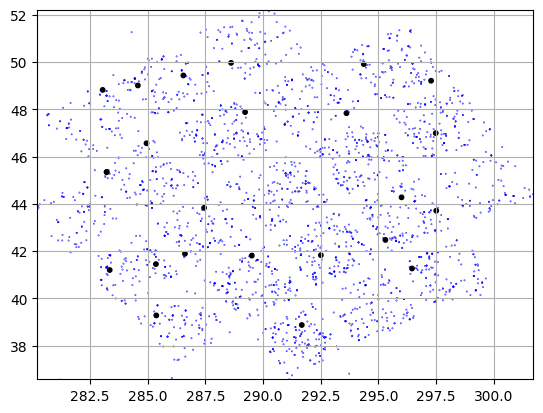

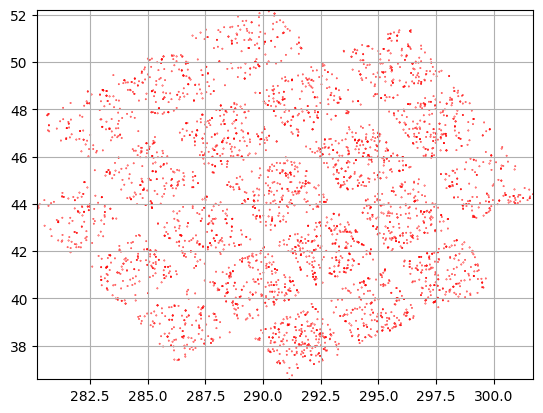

In [21]:
cols = ['ra', 'dec']

koi_habitable_mask = get_habitable_mask(koi, radius_col='koi_prad', temp_col='koi_teq')
print(koi_habitable_mask.sum())
koi_pos = koi[koi['koi_disposition'].isin(['CONFIRMED', 'CANDIDATE'])][cols]
koi_pos['type'] = 'KOI'
koi_pos['type'][koi_habitable_mask] = 'Habitable'

pcsd_habitable_mask = get_habitable_mask(pscd, mass_col='pl_bmasse', radius_col='pl_rade', temp_col='pl_eqt')
pscd_pos = pscd[cols]
pscd_pos['type'] = 'PSCD'
pscd_pos['type'][pcsd_habitable_mask] = 'Habitable'

k_ra_lim = (koi_pos['ra'].min(), koi_pos['ra'].max())
k_dec_lim = (koi_pos['dec'].min(), koi_pos['dec'].max())

colors = {'KOI': 'Red', 'PSCD': 'Blue', 'Habitable': 'Black'}
default_size = .1
sizes = {'KOI': default_size, 'PSCD': default_size, 'Habitable': 10}

plt.xlim(k_ra_lim)
plt.ylim(k_dec_lim)
plt.grid(True)
plt.scatter(pscd_pos['ra'], pscd_pos['dec'], c=pscd_pos['type'].map(colors), s=pscd_pos['type'].map(sizes))
plt.show()

plt.xlim(k_ra_lim)
plt.ylim(k_dec_lim)
plt.grid(True)
plt.scatter(koi_pos['ra'], koi_pos['dec'], c=koi_pos['type'].map(colors), s=koi_pos['type'].map(sizes))
plt.show()

Above we have plotted the objects in both datasets within the region of the sky captured by the Kepler telescope. 